In [1]:
import numpy as np
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 读入数据
data = genfromtxt(r"Delivery.csv",delimiter=',')
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [3]:
# 切分数据
x_data = data[:,:-1]
y_data = data[:,-1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [4]:
# 创建模型
model = linear_model.LinearRegression()
model.fit(x_data,y_data)

LinearRegression()

In [5]:
# 系数
print("coefficients:",model.coef_)
# 截距
print("intercept:",model.intercept_)

# 测试
x_test = [[102,4]]
predict = model.predict(x_test)
print("predict:",predict)

coefficients: [0.0611346  0.92342537]
intercept: -0.868701466781709
predict: [9.06072908]


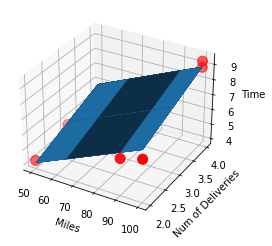

In [6]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker = 'o',s = 100)
x0 = x_data[:,0]
x1 = x_data[:,1]
# 生成网格矩阵
x0,x1 = np.meshgrid(x0,x1)
z = model.intercept_+x0*model.coef_[0]+x1*model.coef_[1]
# 画3D图
ax.plot_surface(x0,x1,z)
# 设置坐标轴
ax.set_xlabel('Miles')
ax.set_ylabel('Num of Deliveries')
ax.set_zlabel('Time')
# 显示图像
plt.show()